In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image


import pathlib

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
from sklearn.utils.class_weight import compute_class_weight

drive.mount('/content/drive')

!cp -r "/content/drive/MyDrive/TxState/2025_Fall/Plant_Project/plant-seedlings-classification" /content/

train_path = "/content/plant-seedlings-classification/train"
test_path = "/content/plant-seedlings-classification/test"

IMG_SIZE = 82
BATCH_SIZE = 32

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = image_generator.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = image_generator.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)



Mounted at /content/drive
Found 3840 images belonging to 12 classes.
Found 955 images belonging to 12 classes.
Class weights: {0: np.float64(1.5165876777251184), 1: np.float64(0.9846153846153847), 2: np.float64(1.391304347826087), 3: np.float64(0.65439672801636), 4: np.float64(1.807909604519774), 5: np.float64(0.8421052631578947), 6: np.float64(0.6106870229007634), 7: np.float64(1.807909604519774), 8: np.float64(0.7729468599033816), 9: np.float64(1.7297297297297298), 10: np.float64(0.7804878048780488), 11: np.float64(1.0062893081761006)}


In [ ]:
test_dir = pathlib.Path(test_path)
test_files = list(test_dir.glob("*.png"))
len(test_files)
print(train_generator.num_classes)


12


In [ ]:
# Model 1, Dense Neural Network

model1 = keras.Sequential([
    layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(train_generator.num_classes, activation='softmax')
])


model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 496ms/step - accuracy: 0.1298 - loss: 2.7598 - val_accuracy: 0.0471 - val_loss: 4.0856
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 54s 445ms/step - accuracy: 0.2500 - loss: 2.1547 - val_accuracy: 0.1927 - val_loss: 2.4070
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 53s 443ms/step - accuracy: 0.3237 - loss: 1.8923 - val_accuracy: 0.1780 - val_loss: 2.7098
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 53s 444ms/step - accuracy: 0.3563 - loss: 1.7580 - val_accuracy: 0.2031 - val_loss: 2.8831
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 53s 445ms/step - accuracy: 0.3582 - loss: 1.7637 - val_accuracy: 0.2168 - val_loss: 3.0997
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 53s 441ms/step - accuracy: 0.3876 - loss: 1.7090 - val_accuracy: 0.1990 - val_loss: 2.5597
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 53s 442ms/step - accuracy: 0.3939 - loss: 1.6554 - val_accuracy: 0.3529 - val_loss: 1.8666
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 53s 442ms/step - accuracy: 0.4118 - loss: 1

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 20172)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,328,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,489,190 (120.12 MB)

 Trainable params: 10,495,884 (40.04 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 20,991,770 (80.08 MB)

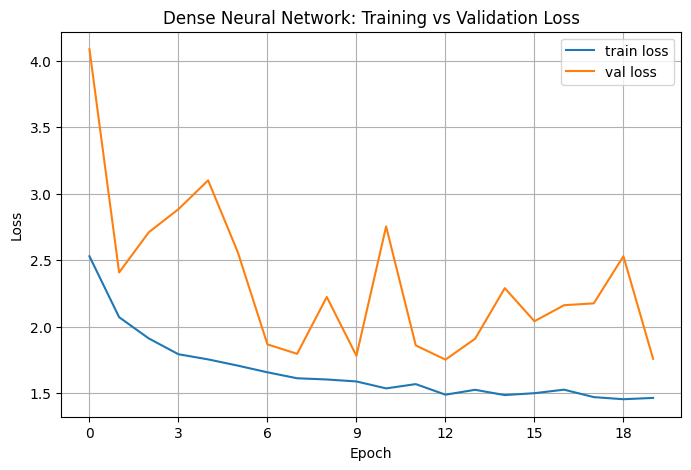

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Dense Neural Network: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

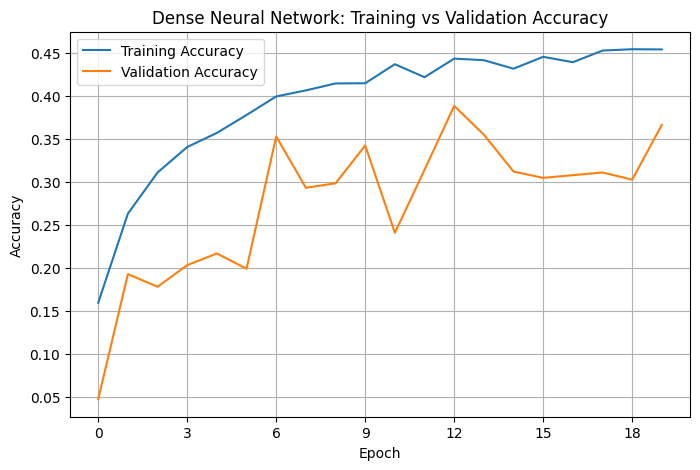

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Dense Neural Network: Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions = []


def load_test_image(path):
    img = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img) / 255.0
    return np.expand_dims(img, axis=0)

for path in test_files:
    img = load_test_image(path)
    probs = model1.predict(img, verbose=0)
    pred_idx = np.argmax(probs)
    pred_class = idx_to_class[pred_idx]
    predictions.append([path.name, pred_class])

df = pd.DataFrame(predictions, columns=["file", "species"])
df.to_csv("seedling_predictions_model1.csv", index=False)